In [1]:
import os
import sys
import caffe
from scipy.stats import ortho_group
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)

caffe.set_mode_gpu()

In [2]:
solver = caffe.SGDSolver('solver.prototxt')

In [3]:
# Random orthogonal initialization
# solver.net.params['lstm1'][2].data[:512] = ortho_group.rvs(512)
# solver.net.params['lstm1'][2].data[512:1024] = ortho_group.rvs(512)
# solver.net.params['lstm1'][2].data[1024:1536] = ortho_group.rvs(512)
# solver.net.params['lstm1'][2].data[1536:] = ortho_group.rvs(512)

In [4]:
a = np.arange(0,32.01,0.01)
d = 0.5*np.sin(2*a) - 0.05 * np.cos( 17*a + 0.8  ) + 0.05 * np.sin( 25 * a + 10 ) - 0.02 * np.cos( 45 * a + 0.3)
d = d / max(np.max(d), -np.min(d))
d = d - np.mean(d)
Nd = len(d) - 1

In [5]:
# 0-1 normalization
d_max = d.max()
d_min = d.min()
d = (d - d_min) / (d_max - d_min)

In [6]:
niter=2000
batch_size = 320
resetter = Nd / batch_size

In [7]:
train_loss = np.zeros(niter)
solver.net.blobs['clip'].data[...] = 1
for i in range(niter) :
    seq_idx = i % resetter
    
    solver.net.blobs['clip'].data[0] = seq_idx > 0
    
    start_idx = seq_idx * batch_size
    end_idx = start_idx + batch_size
    solver.net.blobs['data'].data[:, 0, 0] = d[start_idx:end_idx]
    solver.net.blobs['label'].data[:, 0] = d[start_idx+1:end_idx+1]
    
    solver.step(1)
    
    train_loss[i] = solver.net.blobs['loss'].data

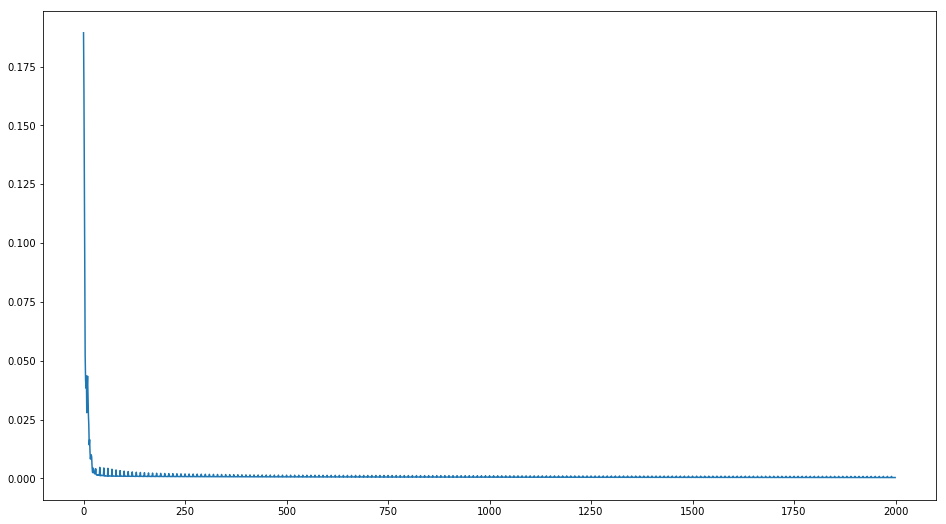

In [8]:
plt.plot(np.arange(niter), train_loss)

In [9]:
preds = np.zeros(len(d))
preds[0] = d[0]
solver.test_nets[0].blobs['data'].data[0,0,0] = d[0]

In [12]:
for i in range(1,len(d)):
    solver.test_nets[0].blobs['clip'].data[0] = i>0
    preds[i] =  solver.test_nets[0].forward()['ip1'][0,0]
    solver.test_nets[0].blobs['data'].data[0,0,0] = preds[i]

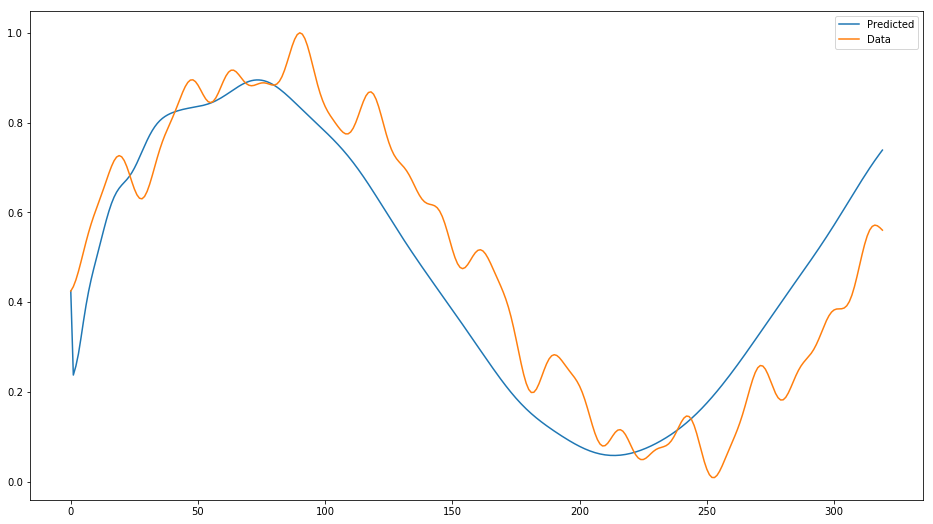

In [13]:
preds_plot, = plt.plot(np.arange(320), preds[:320], label='Predicted')
real_plot, = plt.plot(np.arange(320), d[:320], label='Data')
plt.legend(handles=[preds_plot, real_plot])
plt.show()

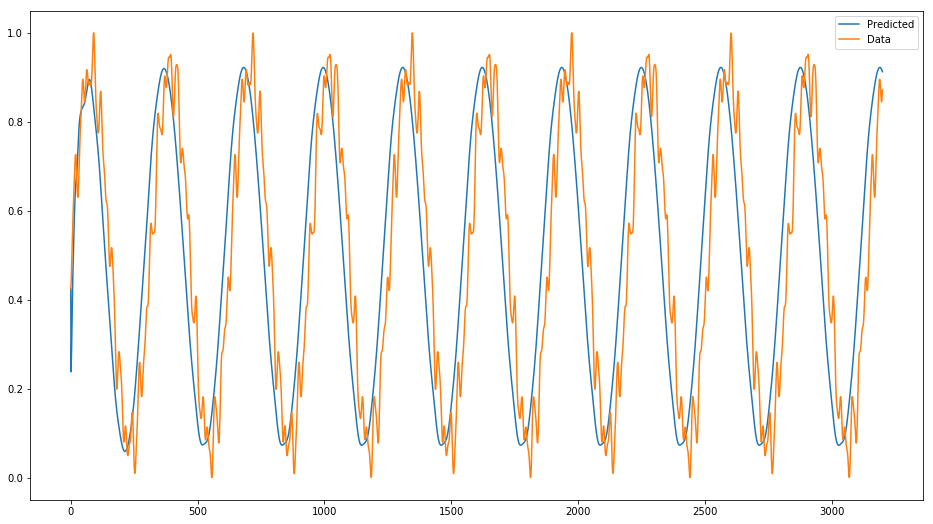

In [14]:
preds_plot, = plt.plot(np.arange(len(d)), preds, label='Predicted')
real_plot, = plt.plot(np.arange(len(d)), d, label='Data')
plt.legend(handles=[preds_plot, real_plot])
plt.show()

In [15]:
caffe.set_mode_cpu()

In [16]:
preds[:100]

array([ 0.42486029,  0.23777017,  0.25757053,  0.28466174,  0.32002991,
        0.3579421 ,  0.39323622,  0.42402738,  0.45054075,  0.47405288,
        0.49616084,  0.51808608,  0.54026145,  0.56235087,  0.58355588,
        0.60297632,  0.61989027,  0.63391215,  0.64505756,  0.6537329 ,
        0.66066527,  0.66677123,  0.67298597,  0.680089  ,  0.68857706,
        0.6986115 ,  0.71003932,  0.72247267,  0.73539186,  0.74824625,
        0.76053661,  0.77187008,  0.78198469,  0.7907548 ,  0.79817581,
        0.80433863,  0.80939794,  0.81353921,  0.81695092,  0.81980258,
        0.82223123,  0.8243382 ,  0.82619083,  0.82783216,  0.82928991,
        0.83058637,  0.83174741,  0.83280683,  0.83380711,  0.83479935,
        0.83583993,  0.83698612,  0.83829302,  0.83980924,  0.8415755 ,
        0.84362137,  0.84596521,  0.84861255,  0.85155559,  0.85477293,
        0.85822928,  0.86187708,  0.86565739,  0.86950117,  0.87333322,
        0.87707275,  0.88063991,  0.88395506,  0.88694459,  0.88